# The `United States Counties` case study

During the 2020 US presidential election, the world and America alike were reminded that where an individual lives can best predict what they will decide for their future (that is, how they vote).

In [47]:
#| output: false
#| echo: false

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

We will use the following data sources to create a dataset that allows us to perform voting analysis:

1. The US Department of Agriculture Economic Research Service (USDA ERS) [https://www.ers.usda.gov/data-products/county-level-data-sets/](https://www.ers.usda.gov/data-products/county-level-data-sets/) produces four datasets

    1. `Education.xls`,
    1. `PopulationEstimates.xls`,
    1. `PovertyEstimates.xls`, and
    1. `Unemployment.xlsx`


1. The US election results from Massachusetts Institute of Technology (MIT) election data [https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ](https://dataverse.harvard.edu/dataset.xhtml?persistentId=doi:10.7910/DVN/VOQCHQ)

We will eventually integrate all this data into a single table.

However, how do we do so?

# Data integration

![](./img/datapreprocessing/integration.JPG)

# Election data

In [48]:
election_df = pd.read_csv('./datasets/census/countypres_2000-2020.csv')
election_df[:4]

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version,mode
0,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203,TOTAL
1,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203,TOTAL
2,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203,TOTAL
3,2000,ALABAMA,AL,AUTAUGA,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203,TOTAL


In [49]:
election_df.columns

Index(['year', 'state', 'state_po', 'county_name', 'county_fips', 'office',
       'candidate', 'party', 'candidatevotes', 'totalvotes', 'version',
       'mode'],
      dtype='object')

# Profiling

In [50]:
election_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72617 entries, 0 to 72616
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   year            72617 non-null  int64  
 1   state           72617 non-null  object 
 2   state_po        72553 non-null  object 
 3   county_name     72617 non-null  object 
 4   county_fips     72560 non-null  float64
 5   office          72617 non-null  object 
 6   candidate       72617 non-null  object 
 7   party           72617 non-null  object 
 8   candidatevotes  72212 non-null  float64
 9   totalvotes      72612 non-null  float64
 10  version         72617 non-null  int64  
 11  mode            72617 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 6.6+ MB


# `mode`s of voting

- `mode` refers to the different ways that individuals had been able to participate in the election.

<Axes: >

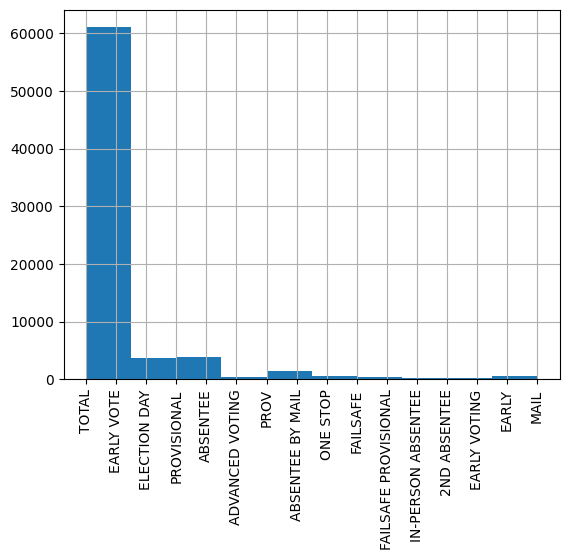

In [51]:
plt.xticks(rotation='vertical')
election_df["mode"].hist()

# 

The `mode` `'TOTAL'` is the sum of all the other modes

1. Data selection: we can drop all the other rows that have modes other than `'TOTAL'`
1. Feature selection: since `mode` now has a single value, we can drop the column
1. Data cleaning: lowering the `county_name`

In [52]:
election_df = election_df[election_df['mode'] == 'TOTAL']
election_df = election_df.drop(columns=['mode'])
election_df["county_name"] = election_df["county_name"].apply(lambda x: x.lower())
election_df[:4]

,year,state,state_po,county_name,county_fips,office,candidate,party,candidatevotes,totalvotes,version
0,2000,ALABAMA,AL,autauga,1001.0,PRESIDENT,AL GORE,DEMOCRAT,4942.0,17208.0,20191203
1,2000,ALABAMA,AL,autauga,1001.0,PRESIDENT,GEORGE W. BUSH,REPUBLICAN,11993.0,17208.0,20191203
2,2000,ALABAMA,AL,autauga,1001.0,PRESIDENT,RALPH NADER,GREEN,160.0,17208.0,20191203
3,2000,ALABAMA,AL,autauga,1001.0,PRESIDENT,OTHER,OTHER,113.0,17208.0,20191203


# `county_fips`

- County FIPS Codes are unique 5-digit codes that represent specific US counties
- We can drop them and keep only the county names

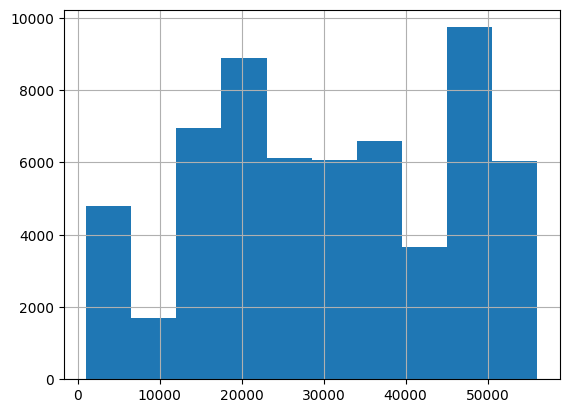

In [53]:
election_df["county_fips"].hist()
election_df = election_df.drop(columns=['county_fips'])

# Checking the granularity of the analysis

How can we find the subject (primary key) of each row?

In [54]:
election_df.groupby(['state', 'state_po']).count()[:8]

,,year,county_name,office,candidate,party,candidatevotes,totalvotes,version
state,state_po,,,,,,,,
ALABAMA,AL,1273,1273,1273,1273,1273,1273,1273,1273
ALASKA,AK,845,845,845,845,845,845,845,845
ARIZONA,AZ,240,240,240,240,240,240,240,240
ARKANSAS,AR,1200,1200,1200,1200,1200,1200,1200,1200
CALIFORNIA,CA,1218,1218,1218,1218,1218,1217,1213,1218
COLORADO,CO,1340,1340,1340,1340,1340,1340,1340,1340
CONNECTICUT,CT,168,168,168,168,168,168,168,168
DELAWARE,DE,60,60,60,60,60,60,60,60


# Granularity: `State` + `County`

In [55]:
election_df.groupby(['state', 'state_po', 'county_name']).count()[:8]

year  office  candidate  party  candidatevotes  \
state   state_po county_name                                                   
ALABAMA AL       autauga        19      19         19     19              19   
                 baldwin        19      19         19     19              19   
                 barbour        19      19         19     19              19   
                 bibb           19      19         19     19              19   
                 blount         19      19         19     19              19   
                 bullock        19      19         19     19              19   
                 butler         19      19         19     19              19   
                 calhoun        19      19         19     19              19   

                              totalvotes  version  
state   state_po county_name                       
ALABAMA AL       autauga              19       19  
                 baldwin              19       19  
                 barbour              19       19  
                 bibb                 19       19  
                 blount               19       19  
                 bullock              19       19  
                 butler               19       19  
                 calhoun              19       19

# Granularity: `State` + `County` + `Year`

In [56]:
election_df.groupby(['state', 'state_po', 'county_name', 'year']).count()[:8]

office  candidate  party  candidatevotes  \
state   state_po county_name year                                             
ALABAMA AL       autauga     2000       4          4      4               4   
                             2004       3          3      3               3   
                             2008       3          3      3               3   
                             2012       3          3      3               3   
                             2016       3          3      3               3   
                             2020       3          3      3               3   
                 baldwin     2000       4          4      4               4   
                             2004       3          3      3               3   

                                   totalvotes  version  
state   state_po county_name year                       
ALABAMA AL       autauga     2000           4        4  
                             2004           3        3  
                             2008           3        3  
                             2012           3        3  
                             2016           3        3  
                             2020           3        3  
                 baldwin     2000           4        4  
                             2004           3        3

# Granularity: `State` + `County` + `Year` + `Party`

In [57]:
election_df.groupby(['state', 'state_po', 'county_name', 'year', 'party']).count()[:8]

office  candidate  \
state   state_po county_name year party                           
ALABAMA AL       autauga     2000 DEMOCRAT         1          1   
                                  GREEN            1          1   
                                  OTHER            1          1   
                                  REPUBLICAN       1          1   
                             2004 DEMOCRAT         1          1   
                                  OTHER            1          1   
                                  REPUBLICAN       1          1   
                             2008 DEMOCRAT         1          1   

                                              candidatevotes  totalvotes  \
state   state_po county_name year party                                    
ALABAMA AL       autauga     2000 DEMOCRAT                 1           1   
                                  GREEN                    1           1   
                                  OTHER                    1           1   
                                  REPUBLICAN               1           1   
                             2004 DEMOCRAT                 1           1   
                                  OTHER                    1           1   
                                  REPUBLICAN               1           1   
                             2008 DEMOCRAT                 1           1   

                                              version  
state   state_po county_name year party                
ALABAMA AL       autauga     2000 DEMOCRAT          1  
                                  GREEN             1  
                                  OTHER             1  
                                  REPUBLICAN        1  
                             2004 DEMOCRAT          1  
                                  OTHER             1  
                                  REPUBLICAN        1  
                             2008 DEMOCRAT          1

# Feature engineering and aggregation: the `partisanism` attribute

- This is too detailed for our analysis
- We can aggregate `party` in the same year by constructing the new attribute `partisanism` = $\frac{republicans - democrats}{all~votes}$
    - partisan (adj): feeling or showing adherence to a particular party, faction, cause, or person
- We coarsen the granularity from (`State` + `County` + `Year` + `Party`) to (`State` + `County` + `Year`)

In [58]:
# Group the election_df by state, county, and year
grouped_df = election_df.groupby(['state_po', 'county_name', 'year'])
# Function to calculate partisanism within each group
def calculate_partisanism(group):
    # Calculate votes for each party
    democrat_votes = group[group['party'] == 'DEMOCRAT']['candidatevotes'].sum()
    republican_votes = group[group['party'] == 'REPUBLICAN']['candidatevotes'].sum()
    # Calculate partisanism: Republicans as positive, Democrats as negative
    return (republican_votes - democrat_votes) / group["candidatevotes"].sum()
# Apply the function to each group
partisanism_df = grouped_df.apply(calculate_partisanism).reset_index(name='partisanism')
partisanism_df[partisanism_df["state_po"] == "NY"][:4]

C:\Users\matteo.francia5\AppData\Local\Temp\ipykernel_37200\2421095359.py:9: RuntimeWarning: invalid value encountered in scalar divide
  return (republican_votes - democrat_votes) / group["candidatevotes"].sum()
C:\Users\matteo.francia5\AppData\Local\Temp\ipykernel_37200\2421095359.py:11: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  partisanism_df = grouped_df.apply(calculate_partisanism).reset_index(name='partisanism')


,state_po,county_name,year,partisanism
11360,NY,albany,2000,-0.267615
11361,NY,albany,2004,-0.229920
11362,NY,albany,2008,-0.294632
11363,NY,albany,2012,-0.322378


# The `partisanism` time series

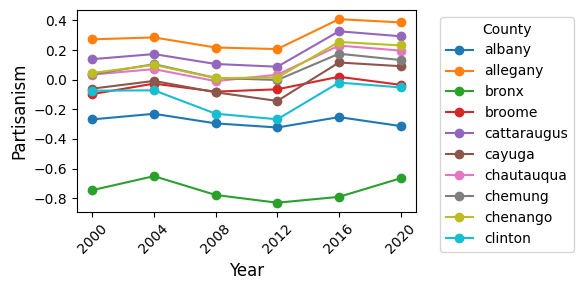

In [59]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))  # Adjust figure size as needed
i = 0
partisanism_df = partisanism_df.sort_values(by=["year", "county_name"])  # sort data by year
filtered_df = partisanism_df[partisanism_df["state_po"] == "NY"]  # consider only counties in NY
for county in filtered_df['county_name'].unique():  # Plot partisanism over time for each county
    county_data = filtered_df[filtered_df['county_name'] == county]
    plt.plot(county_data['year'], county_data['partisanism'], label=county, marker='o')
    if i == 9: break  # only plot the first 10 counties in NY
    i += 1
# Add labels and title
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Partisanism', fontsize=12)
plt.xticks(ticks=filtered_df["year"].unique(), rotation=45)  # Rotate x-axis labels for better readability
ax.legend(title='County', bbox_to_anchor=(1.05, 1), loc='upper left')  # Move legend outside the plot
fig.tight_layout()

# Aggregating `partisanism`

- We have the partisanism value of presidential elections 2000, 2004, 2008, 2012, 2016, and 2020 for every county
- We can interpolate the data and obtain the mean and slope of partisanism across elections over 20 years
- We coarsen the granularity from (`State` + `County` + `Year`) to (`State` + `County`)

In [60]:
#| echo: false

from scipy.optimize import curve_fit

# Define a linear function for curve fitting
def linearFunction(x, a, b): return a * x + b

# Function to compute mean and slope for each group (state_po, county_name)
def compute_mean_slope(wdf):
    n = len(wdf)
    if n <= 1:  # If there's only one data point or none, assign default values
        mean_partisanism = wdf['partisanism'].mean() if n == 1 else np.nan
        slope, intercept = np.nan, np.nan  # No linear interpolation with one point
    else:
        x_data = np.arange(n)  # x_data is range of available data points
        y_data = wdf['partisanism'].values  # y_data is the partisanism values
        try:
            p, _ = curve_fit(linearFunction, x_data, y_data)  # Curve fitting to find slope and intercept
            slope, intercept = p[0], p[1]  # Slope of the linear fit
            mean_partisanism = y_data.mean()
        except Exception as e:
            # print(f"Error in curve fitting for {wdf['state_po'].iloc[0]} {wdf['county_name'].iloc[0]}: {e}")
            slope, intercept, mean_partisanism = np.nan, np.nan, np.nan
    # Return a series with mean and slope
    return pd.Series({'mean': mean_partisanism, 'slope': slope, 'intercept': intercept})

# Group by state_po and county_name and apply the function to each group
partisanism_df = partisanism_df.groupby(['state_po', 'county_name']).apply(compute_mean_slope).reset_index()
partisanism_df.columns = ['State','County_Name', 'Mean_Partisanism', 'Slope_Partisanism', 'Intercept_Partisanism']
partisan_df = partisanism_df.set_index(['State', 'County_Name'])
partisan_df

C:\Users\matteo.francia5\AppData\Local\Temp\ipykernel_37200\2150619413.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  partisanism_df = partisanism_df.groupby(['state_po', 'county_name']).apply(compute_mean_slope).reset_index()


Mean_Partisanism  Slope_Partisanism  Intercept_Partisanism
State County_Name                                                            
AK    district 1           0.274999          -0.076291               0.465726
      district 10          0.404606           0.038843               0.307498
      district 11          0.429907           0.009065               0.407245
      district 12          0.417909           0.019609               0.368885
      district 13          0.289470           0.003915               0.279682
...                             ...                ...                    ...
WY    sweetwater           0.379123           0.055787               0.239655
      teton               -0.155271          -0.086146               0.060094
      uinta                0.540841           0.025489               0.477118
      washakie             0.573747           0.017022               0.531192
      weston               0.691490           0.029408               0.617971

[3151 rows x 3 columns]

# Visualizing the intercept

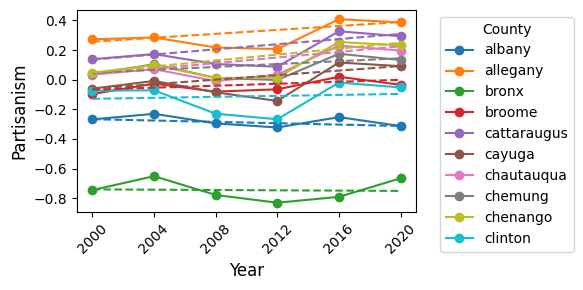

In [61]:
#| echo: false

x_vals = np.arange(1, 7)  # Define a range of x-values to plot the lines (adjust as needed)
cur_df = partisan_df.reset_index()
i = 0
for idx, row in cur_df[cur_df["State"] == "NY"].iterrows():  # Plot a line for each group using the slope and intercept
    y_vals = row['Slope_Partisanism'] * x_vals + row['Intercept_Partisanism']
    ax.plot(np.arange(2000, 2024, 4), y_vals, label=f'{row["County_Name"]}', ls="--")  # Use state and county as labels
    if i == 9: break  # only plot the first 10 counties in NY
    i += 1

fig

# Education data

In [62]:
edu_df = pd.read_excel('./datasets/census/Education.xls')
edu_df[:4]

,"Educational attainment for adults age 25 and older for the U.S., States, and counties, 1970-2019",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44,Unnamed: 45,Unnamed: 46
0,"Sources: U.S. Census Bureau, 1970, 1980, 1990,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,"For definitions of rural classifications, see ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"This table was prepared by USDA, Economic Rese...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...,"Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19",Percent of adults with less than a high school...,Percent of adults with a high school diploma o...,Percent of adults completing some college or a...,Percent of adults with a bachelor's degree or ...


# Do not consider the first 3 rows

In [63]:
edu_df = pd.read_excel('./datasets/census/Education.xls', skiprows=4)
edu_df[:4]

,FIPS Code,State,Area name,2003 Rural-urban Continuum Code,2003 Urban Influence Code,2013 Rural-urban Continuum Code,2013 Urban Influence Code,"Less than a high school diploma, 1970","High school diploma only, 1970","Some college (1-3 years), 1970",...,"Percent of adults completing some college or associate's degree, 2000","Percent of adults with a bachelor's degree or higher, 2000","Less than a high school diploma, 2015-19","High school diploma only, 2015-19","Some college or associate's degree, 2015-19","Bachelor's degree or higher, 2015-19","Percent of adults with less than a high school diploma, 2015-19","Percent of adults with a high school diploma only, 2015-19","Percent of adults completing some college or associate's degree, 2015-19","Percent of adults with a bachelor's degree or higher, 2015-19"
0,0,US,United States,NaN,NaN,NaN,NaN,52373312.0,34158051.0,11650730.0,...,27.4,24.4,26472261.0,59472748.0,63756905.0,70920162.0,11.998918,26.956844,28.898697,32.145542
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,1062306.0,468269.0,136287.0,...,25.9,19.0,458922.0,1022839.0,993344.0,845772.0,13.819302,30.800268,29.912098,25.468332
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,6611.0,3757.0,933.0,...,26.9,18.0,4291.0,12551.0,10596.0,9929.0,11.483395,33.588459,28.356571,26.571573
3,1003,AL,Baldwin County,4.0,5.0,3.0,2.0,18726.0,8426.0,2334.0,...,29.3,23.1,13893.0,41797.0,47274.0,48148.0,9.193843,27.659616,31.284081,31.862459


#

In [64]:
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 47 columns):
 #   Column                                                                    Non-Null Count  Dtype  
---  ------                                                                    --------------  -----  
 0   FIPS Code                                                                 3283 non-null   int64  
 1   State                                                                     3283 non-null   object 
 2   Area name                                                                 3283 non-null   object 
 3   2003 Rural-urban Continuum Code                                           3221 non-null   float64
 4   2003 Urban Influence Code                                                 3221 non-null   float64
 5   2013 Rural-urban Continuum Code                                           3221 non-null   float64
 6   2013 Urban Influence Code                                       

# Selecting some features

In [65]:
edu_df = edu_df[['State', 'Area name', "Percent of adults with a bachelor's degree or higher, 2015-19"]]
edu_df[:4]

,State,Area name,"Percent of adults with a bachelor's degree or higher, 2015-19"
0,US,United States,32.145542
1,AL,Alabama,25.468332
2,AL,Autauga County,26.571573
3,AL,Baldwin County,31.862459


In [66]:
edu_df = edu_df.rename({'Area name': 'Area_Name', "Percent of adults with a bachelor's degree or higher, 2015-19": "HigherEdPercent"}, axis=1)
edu_df = edu_df[edu_df["Area_Name"].apply(lambda x: x.endswith("County"))]
edu_df[:4]

,State,Area_Name,HigherEdPercent
2,AL,Autauga County,26.571573
3,AL,Baldwin County,31.862459
4,AL,Barbour County,11.578713
5,AL,Bibb County,10.378526


# Poverty data

In [67]:
pov_df = pd.read_excel('./datasets/census/PovertyEstimates.xls', skiprows=4)
print(pov_df.columns)
# 'POV04_2019' = Estimated percent of people of all ages in poverty 2019
# 'MEDHHINC_2019' = Estimate of median household income 2019
pov_df = pov_df[['Stabr', 'Area_name', 'PCTPOVALL_2019', 'MEDHHINC_2019']]
pov_df = pov_df.rename({'Area_name': 'Area_Name', 'Stabr': 'State'}, axis=1)
pov_df[:4]

Index(['FIPStxt', 'Stabr', 'Area_name', 'Rural-urban_Continuum_Code_2003',
       'Urban_Influence_Code_2003', 'Rural-urban_Continuum_Code_2013',
       'Urban_Influence_Code_2013', 'POVALL_2019', 'CI90LBALL_2019',
       'CI90UBALL_2019', 'PCTPOVALL_2019', 'CI90LBALLP_2019',
       'CI90UBALLP_2019', 'POV017_2019', 'CI90LB017_2019', 'CI90UB017_2019',
       'PCTPOV017_2019', 'CI90LB017P_2019', 'CI90UB017P_2019', 'POV517_2019',
       'CI90LB517_2019', 'CI90UB517_2019', 'PCTPOV517_2019', 'CI90LB517P_2019',
       'CI90UB517P_2019', 'MEDHHINC_2019', 'CI90LBINC_2019', 'CI90UBINC_2019',
       'POV04_2019', 'CI90LB04_2019', 'CI90UB04_2019', 'PCTPOV04_2019',
       'CI90LB04P_2019', 'CI90UB04P_2019'],
      dtype='object')


,State,Area_Name,PCTPOVALL_2019,MEDHHINC_2019
0,US,United States,12.3,65712
1,AL,Alabama,15.6,51771
2,AL,Autauga County,12.1,58233
3,AL,Baldwin County,10.1,59871


# Unemployment data

In [68]:
employment_df = pd.read_excel('./datasets/census/Unemployment.xlsx', skiprows=4)
employment_df = employment_df[['State', 'Area_name', 'Unemployment_rate_2019']]
employment_df[:4]

,State,Area_name,Unemployment_rate_2019
0,US,United States,3.669308
1,AL,Alabama,3.000000
2,AL,"Autauga County, AL",2.700000
3,AL,"Baldwin County, AL",2.800000


In [69]:
employment_df['Area_Name'] = employment_df.Area_name.apply(lambda v: v[:v.find(',')] if ',' in v else v)
employment_df = employment_df.drop(columns = ["Area_name"], axis=1)
employment_df[:4]

,State,Unemployment_rate_2019,Area_Name
0,US,3.669308,United States
1,AL,3.000000,Alabama
2,AL,2.700000,Autauga County
3,AL,2.800000,Baldwin County


# Population data

In [70]:
pop_df = pd.read_excel('./datasets/census/PopulationEstimates.xls', skiprows=2)
print(pop_df.columns)
pop_df[:4]

Index(['FIPStxt', 'State', 'Area_Name', 'Rural-urban_Continuum Code_2003',
       'Rural-urban_Continuum Code_2013', 'Urban_Influence_Code_2003',
       'Urban_Influence_Code_2013', 'Economic_typology_2015',
       'CENSUS_2010_POP', 'ESTIMATES_BASE_2010',
       ...
       'R_DOMESTIC_MIG_2019', 'R_NET_MIG_2011', 'R_NET_MIG_2012',
       'R_NET_MIG_2013', 'R_NET_MIG_2014', 'R_NET_MIG_2015', 'R_NET_MIG_2016',
       'R_NET_MIG_2017', 'R_NET_MIG_2018', 'R_NET_MIG_2019'],
      dtype='object', length=165)


,FIPStxt,State,Area_Name,Rural-urban_Continuum Code_2003,Rural-urban_Continuum Code_2013,Urban_Influence_Code_2003,Urban_Influence_Code_2013,Economic_typology_2015,CENSUS_2010_POP,ESTIMATES_BASE_2010,...,R_DOMESTIC_MIG_2019,R_NET_MIG_2011,R_NET_MIG_2012,R_NET_MIG_2013,R_NET_MIG_2014,R_NET_MIG_2015,R_NET_MIG_2016,R_NET_MIG_2017,R_NET_MIG_2018,R_NET_MIG_2019
0,0,US,United States,NaN,NaN,NaN,NaN,NaN,308745538,308758105,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1000,AL,Alabama,NaN,NaN,NaN,NaN,NaN,4779736,4780125,...,1.917501,0.578434,1.186314,1.522549,0.563489,0.626357,0.745172,1.090366,1.773786,2.483744
2,1001,AL,Autauga County,2.0,2.0,2.0,2.0,0.0,54571,54597,...,4.847310,6.018182,-6.226119,-3.902226,1.970443,-1.712875,4.777171,0.849656,0.540916,4.560062
3,1003,AL,Baldwin County,4.0,3.0,5.0,2.0,5.0,182265,182265,...,24.017829,16.641870,17.488579,22.751474,20.184334,17.725964,21.279291,22.398256,24.727215,24.380567


#

In [71]:
pop_df = pop_df[['State', 'Area_Name', 'CENSUS_2010_POP']]
pop_df = pop_df.rename({'CENSUS_2010_POP': "population"}, axis=1)
pop_df[:4]

,State,Area_Name,population
0,US,United States,308745538
1,AL,Alabama,4779736
2,AL,Autauga County,54571
3,AL,Baldwin County,182265


# Integration

Now `edu_df`, `pop_df`, `pov_df`, `employment_df` all have the `State` and `Area_Name` columns

In [72]:
print(f"edu_df: {edu_df.columns}")
print(f"pop_df: {pop_df.columns}")
print(f"pov_df: {pov_df.columns}")
print(f"employment_df: {employment_df.columns}")

edu_df: Index(['State', 'Area_Name', 'HigherEdPercent'], dtype='object')
pop_df: Index(['State', 'Area_Name', 'population'], dtype='object')
pov_df: Index(['State', 'Area_Name', 'PCTPOVALL_2019', 'MEDHHINC_2019'], dtype='object')
employment_df: Index(['State', 'Unemployment_rate_2019', 'Area_Name'], dtype='object')


Still, they require some manipulation.

- For instance, they contains data from both the US (aggregated data) and single counties (detailed data)

In [73]:
for cur_df in [edu_df, pop_df, pov_df, employment_df]:
    cur_df.drop(cur_df.index[cur_df['Area_Name'].apply(lambda x: "County" not in x)], inplace=True)  # Only keep the counties
    cur_df['County_Name'] = cur_df['Area_Name'].apply(lambda x: x.replace(" County", "").lower())  # Lower the name of all counties
    cur_df.drop(columns = ['Area_Name'], inplace=True)  # Drop the column `Area_Name`
    cur_df.set_index(['State', 'County_Name'], inplace=True)  # Set the index of the table

#

In [74]:
edu_df[:2]

HigherEdPercent
State County_Name                 
AL    autauga            26.571573
      baldwin            31.862459

In [75]:
pop_df[:2]

population
State County_Name            
AL    autauga           54571
      baldwin          182265

In [76]:
pov_df[:2]

PCTPOVALL_2019  MEDHHINC_2019
State County_Name                               
AL    autauga                12.1          58233
      baldwin                10.1          59871

In [77]:
employment_df[:2]

Unemployment_rate_2019
State County_Name                        
AL    autauga                         2.7
      baldwin                         2.8

# Also, we have `partisan_df`

In [78]:
partisan_df

Mean_Partisanism  Slope_Partisanism  Intercept_Partisanism
State County_Name                                                            
AK    district 1           0.274999          -0.076291               0.465726
      district 10          0.404606           0.038843               0.307498
      district 11          0.429907           0.009065               0.407245
      district 12          0.417909           0.019609               0.368885
      district 13          0.289470           0.003915               0.279682
...                             ...                ...                    ...
WY    sweetwater           0.379123           0.055787               0.239655
      teton               -0.155271          -0.086146               0.060094
      uinta                0.540841           0.025489               0.477118
      washakie             0.573747           0.017022               0.531192
      weston               0.691490           0.029408               0.617971

[3151 rows x 3 columns]

# Joining the sources

In [79]:
county_df = pop_df.join(edu_df).join(pov_df).join(employment_df).join(partisan_df)
county_df[:4]

population  HigherEdPercent  PCTPOVALL_2019  MEDHHINC_2019  \
State County_Name                                                               
AL    autauga           54571        26.571573            12.1        58233.0   
      baldwin          182265        31.862459            10.1        59871.0   
      barbour           27457        11.578713            27.1        35972.0   
      bibb              22915        10.378526            20.3        47918.0   

                   Unemployment_rate_2019  Mean_Partisanism  \
State County_Name                                             
AL    autauga                         2.7          0.467068   
      baldwin                         2.8          0.532724   
      barbour                         3.8          0.034259   
      bibb                            3.1          0.453212   

                   Slope_Partisanism  Intercept_Partisanism  
State County_Name                                            
AL    autauga               0.001845               0.462455  
      baldwin               0.012846               0.500609  
      barbour               0.007185               0.016297  
      bibb                  0.060381               0.302259

#

In [80]:
county_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3007 entries, ('AL', 'autauga') to ('WY', 'weston')
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   population              3007 non-null   int64  
 1   HigherEdPercent         3005 non-null   float64
 2   PCTPOVALL_2019          3000 non-null   float64
 3   MEDHHINC_2019           3000 non-null   float64
 4   Unemployment_rate_2019  2999 non-null   float64
 5   Mean_Partisanism        3003 non-null   float64
 6   Slope_Partisanism       3003 non-null   float64
 7   Intercept_Partisanism   3003 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 341.0+ KB


# Handling the missing values

In [81]:
county_df.dropna(inplace=True)
county_df.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 2992 entries, ('AL', 'autauga') to ('WY', 'weston')
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   population              2992 non-null   int64  
 1   HigherEdPercent         2992 non-null   float64
 2   PCTPOVALL_2019          2992 non-null   float64
 3   MEDHHINC_2019           2992 non-null   float64
 4   Unemployment_rate_2019  2992 non-null   float64
 5   Mean_Partisanism        2992 non-null   float64
 6   Slope_Partisanism       2992 non-null   float64
 7   Intercept_Partisanism   2992 non-null   float64
dtypes: float64(7), int64(1)
memory usage: 275.4+ KB


# Outliers

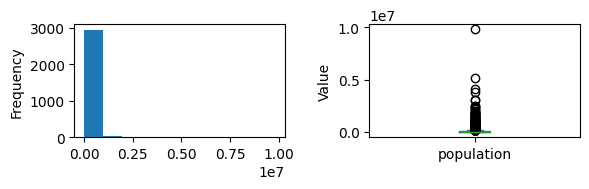

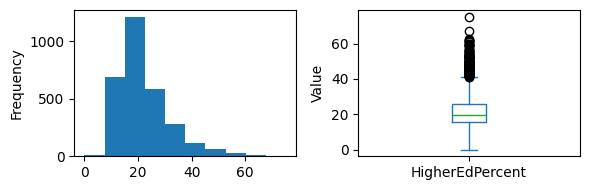

In [82]:
for att in county_df.columns[:2]:
    fig, axs = plt.subplots(1, 2, sharey=False, figsize=(6, 2))
    county_df[att].plot.hist(ax=axs[0])
    county_df[att].plot.box(vert=True, ax=axs[1])
    axs[1].set_ylabel('Value')
    fig.tight_layout()

# Setting the `class` attribute

In [83]:
def set_class(x):
    if x > 0.1: return "republican"
    elif x > -0.1: return "other"
    else: return "democratic"

county_df["class"] = county_df["Mean_Partisanism"].apply(set_class)
county_df[:4]

population  HigherEdPercent  PCTPOVALL_2019  MEDHHINC_2019  \
State County_Name                                                               
AL    autauga           54571        26.571573            12.1        58233.0   
      baldwin          182265        31.862459            10.1        59871.0   
      barbour           27457        11.578713            27.1        35972.0   
      bibb              22915        10.378526            20.3        47918.0   

                   Unemployment_rate_2019  Mean_Partisanism  \
State County_Name                                             
AL    autauga                         2.7          0.467068   
      baldwin                         2.8          0.532724   
      barbour                         3.8          0.034259   
      bibb                            3.1          0.453212   

                   Slope_Partisanism  Intercept_Partisanism       class  
State County_Name                                                        
AL    autauga               0.001845               0.462455  republican  
      baldwin               0.012846               0.500609  republican  
      barbour               0.007185               0.016297       other  
      bibb                  0.060381               0.302259  republican

In [84]:
#| echo: false
#| output: false

colors = {"republican": "blue", "democratic": "red", "other": "grey"}
def color(s):
    return colors[s]

# Distribution of `class`

<Axes: >

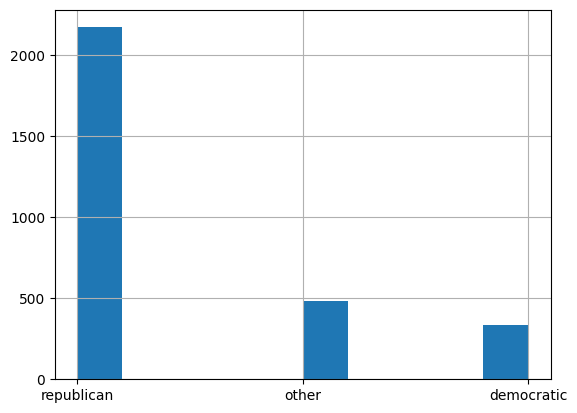

In [85]:
county_df["class"].hist()

# Checking for data correlations

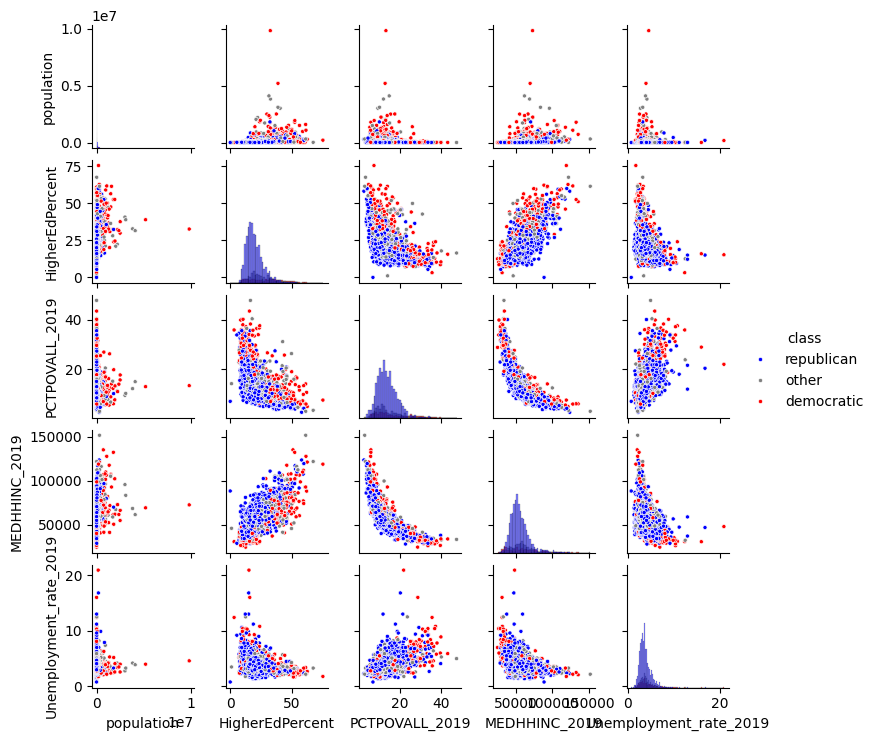

In [86]:
county_df_no_p = county_df[[x for x in county_df.columns if "Partisanism" not in x]]
sns.pairplot(county_df_no_p, diag_kind="hist", hue="class", markers=".", height=1.5, palette=colors)

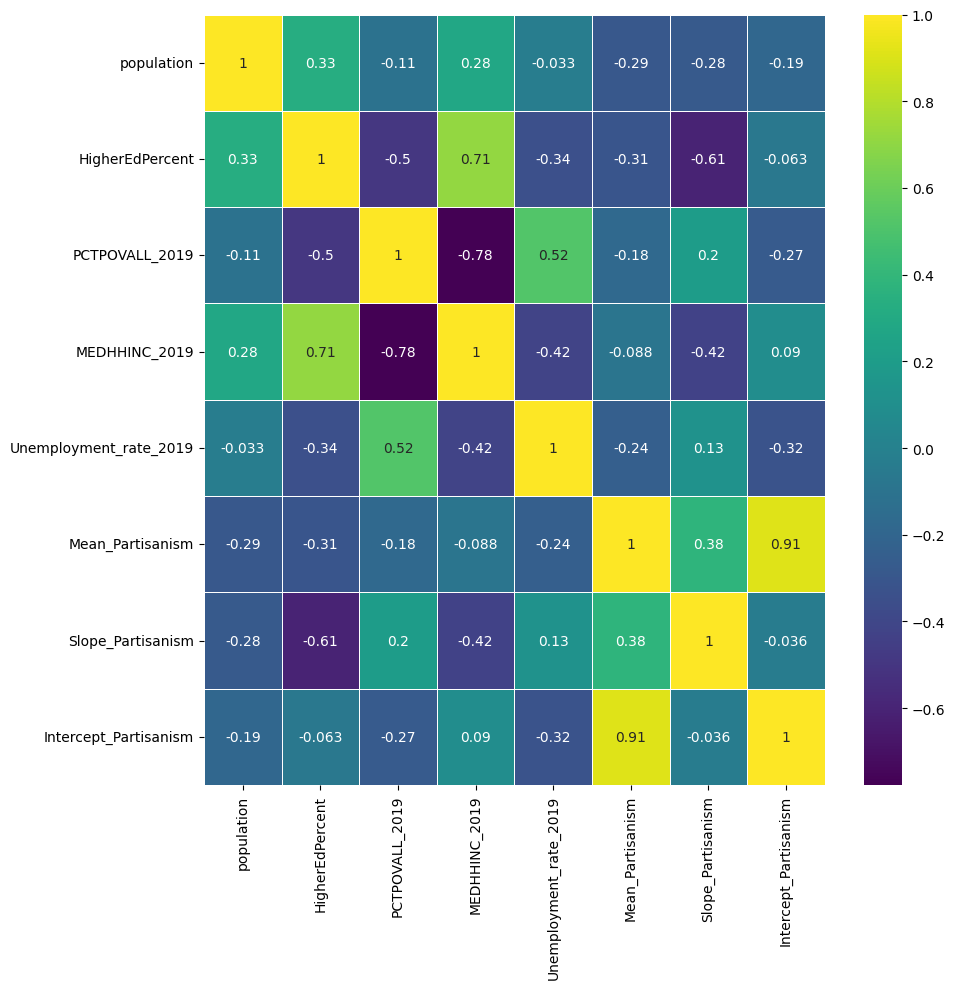

In [87]:
#| echo: false
#| output: false

plt.figure(figsize=(10,10))
sns.heatmap(county_df.drop(columns=["class"]).corr(), linewidths=.5, annot=True, cmap='viridis')
plt.tight_layout()

# Using PCA to visualize the dataset

In [92]:
from sklearn.decomposition import PCA

Xs = county_df.drop(columns=["Mean_Partisanism", "Slope_Partisanism", "Intercept_Partisanism", "class"])
Xs = (Xs -Xs.mean()) / Xs.std()
pca = PCA(n_components=2)
pca.fit(Xs)
Xs_t = pd.DataFrame(pca.transform(Xs), index = Xs.index)
Xs_t.columns = ['PC{}'.format(i) for i in range(1, len(Xs_t.columns) + 1)]
Xs_t[:4]

PC1       PC2
State County_Name                    
AL    autauga      0.842913 -0.480630
      baldwin      1.421399 -0.079301
      barbour     -2.467584  0.083543
      bibb        -1.266816 -0.463199

In [93]:
#| echo: false
#| output: false

total_variance = Xs_t.var().sum()
explanation_df = pd.DataFrame({'variance_percentage': Xs_t.var() / total_variance, 'cumulative_variance_percentage': Xs_t.var().cumsum() / total_variance})
explanation_df

,variance_percentage,cumulative_variance_percentage
PC1,0.724688,0.724688
PC2,0.275312,1.000000


# Visualizing the data

d:\OneDrive\OneDrive - Alma Mater Studiorum Università di Bologna\teaching-bigdata\AA2425-unibo-mldm\slides\venv\Lib\site-packages\pandas\plotting\_matplotlib\core.py:1351: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


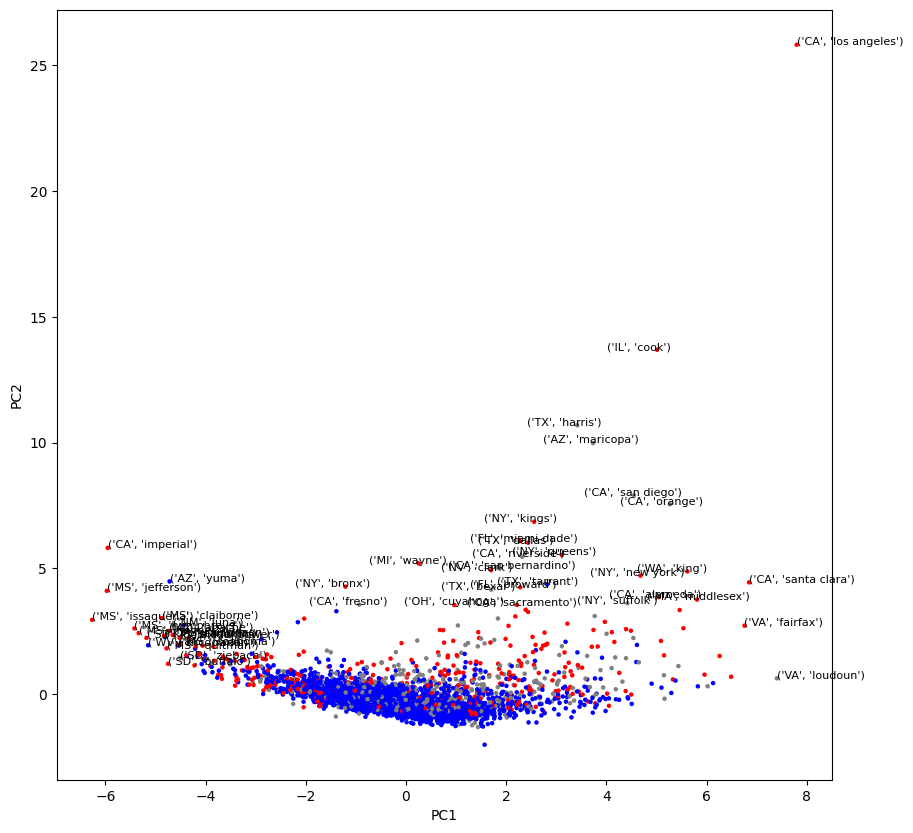

In [95]:
Xs_t.plot.scatter(x='PC1', y='PC2', c=county_df["class"].apply(color), sharex=False, colormap ='gray', marker='.',figsize=(10, 10))

for i, row in Xs_t.iterrows():
    if row.PC1 > 6.5 or row.PC1 < -4.5:
        plt.annotate(i, (row.PC1, row.PC2), size=8)
    elif row.PC2 < -7 or row.PC2 > 3.5:
        plt.annotate(i, (row.PC1 - 1, row.PC2), size=8)

# Doing machine learning

1.0

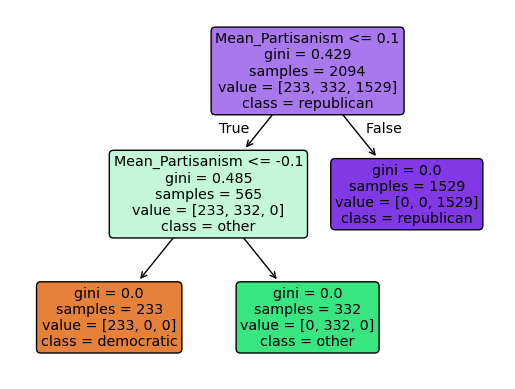

In [45]:
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

def dtree(county_df, max_depth, print_text=False, plot=True):
    X = county_df.drop(columns='class')
    y = county_df['class']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)  # Split the data into training and testing sets
    clf = DecisionTreeClassifier(max_depth=max_depth)  
    clf.fit(X_train, y_train)  # Train the decision tree on the training data
    y_pred = clf.predict(X_test)  # Make predictions on the test data
    if plot: plot_tree(clf, feature_names=X.columns, class_names=clf.classes_, filled=True, rounded=True)
    if print_text: tree_text = print(export_text(clf, feature_names=list(X.columns)))
    return accuracy_score(y_test, y_pred)  # Compute the accuracy

dtree(county_df, max_depth=3)

# Another decision tree

In [46]:
dtree(county_df.drop(columns=["Mean_Partisanism", "Slope_Partisanism", "Intercept_Partisanism"]), max_depth=3, print_text=True, plot=False)

|--- HigherEdPercent <= 32.32
|   |--- PCTPOVALL_2019 <= 24.15
|   |   |--- population <= 151576.00
|   |   |   |--- class: republican
|   |   |--- population >  151576.00
|   |   |   |--- class: republican
|   |--- PCTPOVALL_2019 >  24.15
|   |   |--- Unemployment_rate_2019 <= 7.15
|   |   |   |--- class: democratic
|   |   |--- Unemployment_rate_2019 >  7.15
|   |   |   |--- class: democratic
|--- HigherEdPercent >  32.32
|   |--- PCTPOVALL_2019 <= 6.75
|   |   |--- population <= 394221.50
|   |   |   |--- class: republican
|   |   |--- population >  394221.50
|   |   |   |--- class: other
|   |--- PCTPOVALL_2019 >  6.75
|   |   |--- population <= 242827.00
|   |   |   |--- class: democratic
|   |   |--- population >  242827.00
|   |   |   |--- class: democratic



0.734966592427617